In [32]:
from transformers import BertForSequenceClassification
from scipy.special import softmax
import pandas as pd
from IPython.display import Image


model = BertForSequenceClassification.from_pretrained("./results/saved-models")

from transformers import BertTokenizer

tokenizer = BertTokenizer.from_pretrained("./results/saved-models")


In [33]:
IMAGE_PATH = '../data/images/'

In [34]:
mappings = pd.read_csv('../data/pokemon_mapping.csv')

In [35]:
mappings

,name,path,index
0,Bulbasaur,1.png,0
1,Ivysaur,2.png,1
2,Venusaur,3.png,2
3,Charmander,4.png,3
4,Charmeleon,5.png,4
...,...,...,...
146,Dratini,147.png,146
147,Dragonair,148.png,147
148,Dragonite,149.png,148
149,Mewtwo,150.png,149


In [102]:
text = ["fire"]
encoding = tokenizer(text, return_tensors="pt", truncation=True, padding=True)

In [103]:
# forward pass
outputs = model(**encoding)
predictions = outputs.logits.detach().numpy()[0]
predictions = [(idx, single_output) for idx, single_output in enumerate((softmax(predictions)*100))]
predictions.sort(key=lambda x: x[1], reverse=True)
predictions[:3]


[(5, 9.506259), (125, 8.94462), (145, 3.5179534)]

Prediction softmax: 9.51%
Predicted name: Charizard


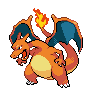

Prediction softmax: 8.94%
Predicted name: Magmar


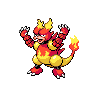

Prediction softmax: 3.52%
Predicted name: Moltres


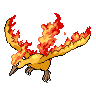

In [104]:
for prediction in predictions[:3]:
    pk_name = mappings.loc[mappings["index"]==prediction[0]]["name"].values[0]
    print(f"Prediction softmax: {prediction[1]:.2f}%")
    print(f"Predicted name: {pk_name}")
    img = mappings.loc[mappings["index"]==prediction[0]]["path"].values[0]
    display(Image(filename=IMAGE_PATH + img, width = 300, height = 300))